# Getting Started With OpenCV
---

## What is OpenCV?

OpenCV (Open-Source Computer Vision) is an open-source library focused on computer vision algorithms. The library has more than 2500 optimized algorithms implementing both classical, state-of-the-art and machine-learning-based algorithms for a variety of applications.

OpenCV is currently available under a BSD license, hence is free for both academic and commercial use.

---

## OpenCV-Python

OpenCV was originally implemented in C++. However, due to the ease-of-use of the Python programming language, a Python API was developed for the same.

* OpenCV-Python is a Python wrapper for the C++ implementation.
* OpenCV-Python uses Numpy, a highly optimized library for scientific computing. Therefore, all OpenCV array structures are converted to and from Numpy Arrays.

---

## Basic Concepts
---

### Images in OpenCV-Python

---

#### Representation
In OpenCV-Python, images are represented as multi-dimensional `numpy` arrays. 

**Color** Images are 3D arrays with the following dimensions:
* Height (Number of Rows)
* Width (Number of Columns)
* Channels (typically 3 for BGR i.e. Blue-Green-Red images)

**Grayscale** Images are 2D arrays with only the Height and Width dimensions.

Each (row, col) represents a pixel. 

---

#### Coordinate System

* The origin (0,0) of an image is a the top-left corner of the image.
* X-coordinate increases moving right
* Y-coordinate increases moving down

---




## Standard Imports

When working with these tutorials, the following libraries are imported everywhere. If you wish to use OpenCV in a Jupyter Notebook, it would be useful for you to go through the code in `tutorial_utils/utils.py`. 

In [9]:
import cv2
import numpy as np
from tutorial_utils.utils import *
from matplotlib import pyplot as plt
DATA_DIR = data_dir()

---

## A Note on the usage of `:` and `-1` in Numpy Indexing

In Numpy, the colon (`:`) is used for slicing along one or more dimensions. It follows the Python slicing syntax `start:stop:step`. 

---

#### Selecting All Elements along a dimension

* For a 1-D array, `arr[:]` selects ALL elements in the array
* In multi-dimensional arrays, we need to separate each dimension by a `,`, or for better clarity, use separate `[]` for each dimension. If any of those dimensions contain a `:`, then it means we select ALL elements in that dimension.
    * For example, `arr[:, 0]` or `arr[:][0]` selects ALL rows of the first column, in a 2D array.

---

#### Specifying Ranges

* For **a given dimension**, the range of values selected is defined by `start`,`stop` (exclusive), and `step`. A `step` of -1 reverses the array.
    * `arr[1:5]` : Selects elements from idx 1 to (but not including) 5
    * `arr[:3]` : Selects elements from beginning upto (but not including) idx 3
    * `arr[2:]` : Selects elements from idx 2 to the end
    * `arr[::2]` : Select every second element (i.e. step of 2)
    * `arr[::-1]` : Reverse the array (step of -1)
    * Note that all the above are on 1-D arrays!

---

#### Accessing the last element + Specifying slice Boundaries

`arr[-1]` gets the last element of `arr`. Similarly, `arr[-2]` gets the second-to-last element.

This means that we can use negative numbers to specify a boundary relative to the end of the array:
* `arr[:-1]` : Select all element except the last one
* `arr[-3:]` : Select the last 3 elements
* Note that all the above are 1-D arrays!

---

#### Reshaping

When reshaping a numpy array, `-1` has a special meaning. It tells numpy to automatically calculate the size of that dimension based on the array's total number of elements, and the sizes of other dimensions. Only one dimension can be 'inferred' using a `-1`.

---

### Summary

---

**For 1-D Arrays**

Suppose the input array is `arr = np.arange(6)`

| Syntax | Purpose                        | Example (arr = np.arange(6)) | Result                     |
|--------|--------------------------------|------------------------------|----------------------------|
| :      | Select all elements in a dimension | arr[:]                       | array([0, 1, 2, 3, 4, 5]) |
| -1     | Last element                   | arr[-1]                      | 5                          |
| :-1    | All elements except the last   | arr[:-1]                     | array([0, 1, 2, 3, 4])    |
| ::-1   | Full slice, reversed           | arr[::-1]                    | array([5, 4, 3, 2, 1, 0]) |

---

**For 2-D Arrays** (concept can be extended to multiple dimensions)

Suppose the input array is `array([[0, 1, 2], [3, 4, 5]])`


| Syntax  | Purpose                          | Example (arr_2d)   | Result                          |
|---------|----------------------------------|--------------------|---------------------------------|
| :, 0    | All rows, first column           | arr_2d[:, 0]       | array([0, 3])                   |
| -1      | Last row                         | arr_2d[-1]         | array([3, 4, 5])                |
| :, ::-1 | All rows, all columns reversed   | arr_2d[:, ::-1]    | array([[2, 1, 0], [5, 4, 3]])   |




---
## 1. Loading and Displaying Images
---

### 1.1 Displaying Images in GUI Windows

In OpenCV, a "window" is a GUI (Graphical User Interface) element that can be used to display images, videos and trackbars. Its primary purpose is to visualize the results of computer vision tasks in a local desktop environment.

---

#### Workflow

The typical sequence of commands to be followed to load and display an image in a GUI window is as follows:

1. Read the Image using `imread()`

2. Create a Window using `namedWindow()`. This doesn't show anything on the screen yet.

3. Resize or Move the window using `resizeWindow()` or `moveWindow()`

4. Display the image in the Window using `imshow()`.

5. Wait for User Input (key press) using `waitKey()` to close the image

6. Destroy the window using `destroyWindow()` or `destroyAllWindows()`

---

#### Reading the image

OpenCV provides `cv2.imread()` to read an image from a file. It has the following parameters:

* Path to the image file

* Flag specifying how to read the image
  * `cv2.IMREAD_COLOR` (or `1`) : Loads a color image (default)
  * `cv2.IMREAD_GRAYSCALE` (or `0` ) : Loads image in grayscale mode
  * `cv2.IMREAD_UNCHANGED` (or `-1`) : Loads image as-is, including the alpha channel


```

Usage: 

image = cv2.imread('filename.jpg')

image_gray = cv2.imread('file_name.jpg, cv2.IMREAD_GRAYSCALE)
```

---

#### Creating a Window


You can create a window using `cv2.namedWindow()`. 

Parameters:

* `name` : A unique identifier for this window
* `flag` : Resizing options
    * `WINDOW_NORMAL` : If this is set, the user can resize the window
    * `WINDOW_AUTOSIZE` : If this is set, the window size is automatically adjusted to fit the displayed image, so you cannot change the size manually
    * `WINDOW_OPENGL` : If this is set, the window is created with OpenGL support

Note that creating a window does not automatically display anything on the screen.


```
Usage:

cv2.namedWindow('window')

```

---

#### Resizing and Moving Windows

```
Usage:

# Move a window
# x, y = desired location of the top-left corner of the window, in screen coordinates

cv2.moveWindow(name, x, y)

# Resize a window
cv2.resizeWindow(name, width, height)
```

---

#### Displaying the Image

OpenCV provides `cv2.imshow()` to actually display the image inside a window.

* This function takes `window_name` as an argument. If a window has been created with that name, the image is displayed in that window. Otherwise, a new window is automatically created with `window_name` and the image is displayed in it.

* The function keeps displaying the image in the window unless an external function, such as `cv2.waitKey()` terminates it.


```
Usage:

cv2.imshow('window_name', image)
```

---

#### Waiting for User Input to Close the Image Window

OpenCV provides the `cv2.waitKey()` function that operates on all open windows.

This function takes an integer argument. This represents milliseconds of time.
* This function waits for the provided amount of milliseconds of time, for a key press from the user. After that, it closes the window.

* If the argument is `0`, this function waits indefinitely for a key press from the user. Until then it keeps displaying any open windows.

* The function captures the pressed key and returns it.


```
Usage:

k = cv2.waitKey(0) # wait indefinitely

k = cv2.waitKey(3000) # wait for 3 seconds

```
---

#### Destroy the Window(s)

At the end of your program, you need to call `cv2.destroyWindow(name)` or `cv2.destroyAllWindows()` to cleanly close all window(s).


```
Usage:

# Destroy a window
cv2.destroyWindow('window')

# Destroy all windows
cv2.destroyAllWindows()
```

---

#### Examples

Jupyter Notebooks operate within a web browser and do not directly support the creation of these GUI windows. 

Refer to  [`00_GUI_Features/01_load_display_and_save_images.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/01_load_display_and_save_images.py) for an example on how to use the above code.

---

### 1.2 Displaying Images in Jupyter Notebook

Loading and Displaying images in a Jupyter Notebook is relatively easier. See the below example.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


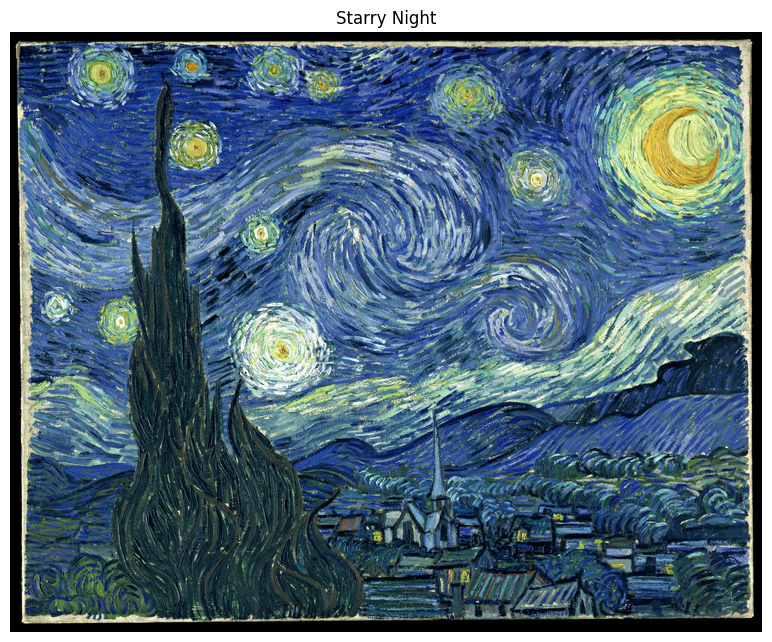

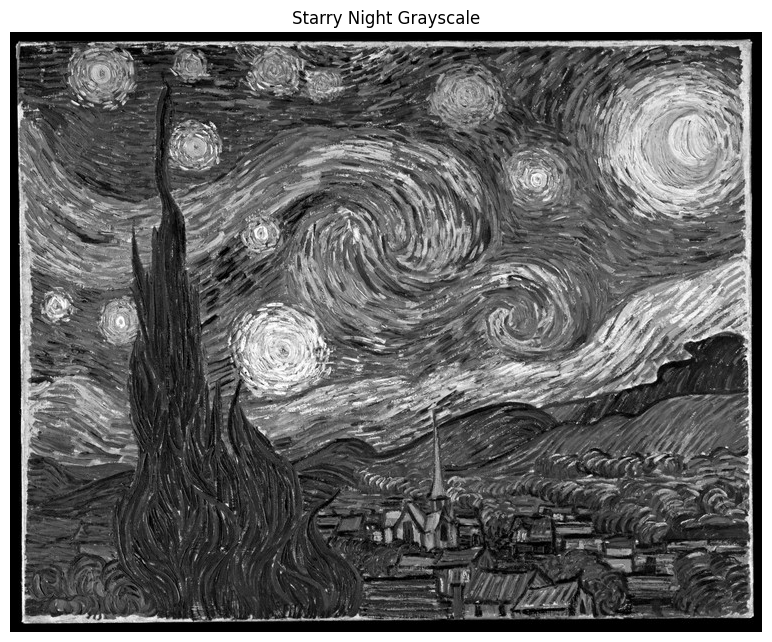

In [22]:
# Read the image

img = cv2.imread(DATA_DIR + 'starry_night.jpg')

img_gray = cv2.imread(DATA_DIR + 'starry_night.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image

cv2_imshow(img, title='Starry Night')

cv2_imshow(img_gray, title='Starry Night Grayscale')

## 2. Saving Images to a File
---

OpenCV provides `cv2.imwrite()` to save an image to a file. 

An example of this is shown in the script : [`00_GUI_Features/01_load_display_and_save_images.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/01_load_display_and_save_images.py) 

Here is an example of how we can use it within Jupyter Notebook:

In [23]:
# Read the image

img = cv2.imread(DATA_DIR + 'starry_night.jpg')

# Save the image to a file
cv2.imwrite("/tmp/starry_night_saved.png", img)

True

---
## 3. Loading and Displaying Videos
---

### 3.1 Displaying Videos in GUI Windows

---

#### Workflow

The typical sequence of commands to be followed to load and display an image in a GUI window is as follows:

1. Create and initialize a `VideoCapture` object that reads from a camera device or from a video file

2. Inspect (`get`) and/or Set (`set`) the properties of the `VideoCapture` object

3. Read from the `VideoCapture` object, frame-by-frame. Each frame is an image.

4. Operate on the image (optional)

5. Display the image using `imshow()`

6. Wait for a user input (key press) with a fixed non-zero milliseconds timer, to exit the loop

7. Release the `VideoCapture` object

8. Destroy the window using `destroyWindow()` or `destroyAllWindows()`

---

#### Create a VideoCapture object

`cv2.VideoCapture` objects are how you can 'stream' video frames into OpenCV. The constructor takes either a `device_id` of the camera, or a `filename` of the file as an argument.

```
Usage:

cap = cv2.VideoCapture(0)

or

cap = cv2.VideoCapture('filename.avi')

```


#### Inspect and/or Set Properties

You can inspect the properties of the `cv2.VideoCapture` object using its `get()` method. This function takes an enumerated integer id from 0 to 18.

You can set the properties of the `cv2.VideoCapture` object using its `set()` method.


```
Usage:

a = cap.get(3)
b = cap.get(CV_CAP_PROP_FRAME_WIDTH)

cap.set(3, 500)
cap.set(CV_CAP_PROP_FRAME_HEIGHT, 400)

```

Here is the list of Properties:
```
0   CV_CAP_PROP_POS_MSEC # Current position of the video file in milliseconds.
1   CV_CAP_PROP_POS_FRAMES # 0-based index of the frame to be decoded/captured next.
2   CV_CAP_PROP_POS_AVI_RATIO # Relative position of the video file
3   CV_CAP_PROP_FRAME_WIDTH # Width of the frames in the video stream.
4   CV_CAP_PROP_FRAME_HEIGHT # Height of the frames in the video stream.
5   CV_CAP_PROP_FPS # Frame rate.
6   CV_CAP_PROP_FOURCC # 4-character code of codec.
7   CV_CAP_PROP_FRAME_COUNT # Number of frames in the video file.
8   CV_CAP_PROP_FORMAT # Format of the Mat objects returned by retrieve() .
9   CV_CAP_PROP_MODE # Backend-specific value indicating the current capture mode.
10   CV_CAP_PROP_BRIGHTNESS # Brightness of the image (only for cameras).
11   CV_CAP_PROP_CONTRAST # Contrast of the image (only for cameras).
12   CV_CAP_PROP_SATURATION # Saturation of the image (only for cameras).
13   CV_CAP_PROP_HUE # Hue of the image (only for cameras).
14   CV_CAP_PROP_GAIN # Gain of the image (only for cameras).
15   CV_CAP_PROP_EXPOSURE # Exposure (only for cameras).
16   CV_CAP_PROP_CONVERT_RGB # Boolean flags for converting images to RGB.
17   CV_CAP_PROP_WHITE_BALANCE # Currently unsupported

#(note: only supported by DC1394 v 2.x backend currently)
18   CV_CAP_PROP_RECTIFICATION # Rectification flag for stereo cameras
```

---

#### Read from VideoCapture object

In order to extract individual frames from a `cv2.VideoCapture` object, you need to call its `read()` method. This frame is an OpenCV Image, and you can do operations on it like you would with any other OpenCV Image.

```
Usage:


# If the frame is read correctly, ret == true.
ret, frame = cap.read()

```

---

#### Controlling Playback Speed

In order to continuously read frames from the `cv2.VideoCapture` object, we need to display the frame, then close it after a few milliseconds. The time for which the image persists, can be set inside `cv2.waitKey()`. 

```
Usage:

waitKey(1) # Display for 1ms. Can make the video feel like it is playing back too fast

waitKey(25) # Display for 25ms. Typically ok

waitKey(100) # Display for 100ms. Can make video playback feel slow
```

---

#### Release the VideoCapture object

Once you are done operating on the video, you must release the `VideoCapture` object.

```
Usage:

# cap is a VideoCapture object.

cap.release()
```

---

#### Examples

Jupyter Notebooks operate within a web browser and do not directly support the creation of the GUI windows. Therefore, they cannot work well with displaying videos. The following examples are provided in Python Scripts.

**Example 1 : Displaying Video feed from a Camera**

Refer to  [`00_GUI_Features/02_capture_and_display_video_from_camera.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/02_capture_and_display_video_from_camera.py) 

**Example 2 : Displaying Video played back from a File**

Refer to  [`00_GUI_Features/03_play_video_from_file.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/03_play_video_from_file.py) 


---



## 4. Saving Videos to a File
---

### (Python Scripts Only)

In order to save videos to a file, we need to define a `codec` and a `cv2.VideoWriter` object.

* A CODEC (coder-decoder) compresses and decompresses digital media files.

* FourCC is a 4-byte code that is used to specify the video codec.
    * The list of available codes can be found at fourcc.org.
    * It is platform-dependent

```
Usage:

# Specify Codec
codec = cv2.VideoWriter.fourcc('M', 'J', 'P', 'G') 

or 

codec = cv2.VideoWriter.fourcc(*'MJPG')
```

* When defining the `VideoWriter` object, we provide the following arguments:
    * Name of the output file
    * Codec
    * Frames-Per-Second (fps)
    * (Width, Height) in pixels

```
Usage:

out = cv2.VideoWriter('output.avi', codec, 20.0, (640, 480))
```

---

### Example

An example for this is provided at [`00_GUI_Features/04_saving_video_to_file.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/04_saving_video_to_file.py)

---


## 5. Miscellaneous

---

### 5.1 GUI Elements : Trackbar

**(Only for use in Python Scripts)**

OpenCV provides `createTrackbar()` to allow users to make an interactive slider. The slider can be used to make programs that interact with the images or videos that are being processed and displayed. The value of the slider can be obtained from `getTrackbarPos()`.

* The trackbar operates on integer values.

* The minimum value is always 0.

* The user can set a default value and a max value for the slider.

* The trackbar also takes a callback function as one of its arguments. This callback function is executed whenever the user interacts with the trackbar.

OpenCV does not provide binary switches/buttons by default, but one can use a Trackbar like an ON/OFF switch by setting the max value to 1.


```
Usage:

cv2.createTrackbar('Name', 'window_name', default_value, max_value, callback)

val = cv2.getTrackbarPos('Name', 'window_name')

cv2.setTrackbarPos('Name', 'window_name', pos)

```

---

#### Example

An example for this is provided at [`00_GUI_Features/05_interactive_trackbar.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/05_interactive_trackbar.py)

---

### 5.2 GUI Elements : Mouse Interaction

**(Only for use in Python Scripts)**

A `cv2.namedWindow()` can be assigned a Mouse Callback function using `cv2.setMouseCallback()`. Whenever the user interacts with the window using their mouse, an Mouse 'Event' is generated. The callback function gets executed using the 'Event' as one of its arguments.

Depending on what type of 'Event' occurred, one can perform various actions.


---

#### Examples

**Example 1 : Drawing a Circle upon Double-Clicking with a Mouse**

In this example, 
* A blank window is initially displayed.
* When the user double clicks at a point in the window, a blue solid-filled circle of fixed radius is drawn.
* The user needs to press 'q' or 'ESC' key to exit.


Refer to  [`00_GUI_Features/06_draw_circle_on_mouse_dblclick.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/06_draw_circle_on_mouse_dblclick.py) 

**Example 2 : Drawing a Rectangle or Circle with a Mouse**

In this example, 
* A blank window is initially displayed.
* The user can click, drag and release the left mouse button to create a rectangle or a circle, depending on the drawing 'mode'.
* This mode can be changed by clicking on the 'm' key.
* The user needs to press 'q' or 'ESC' key to exit.

Refer to  [`00_GUI_Features/07_draw_rectangle_or_circle_with_mouse`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/00%20GUI%20Features/07_draw_rectangle_or_circle_with_mouse.py) 
